# ANALISI DATI ESERCIZIO 1

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'font.size': 14})

## Esercizio 1.1

### MEDIA

In questo esercizio ho calcolato media di una variabile $r$ estratta uniformemente dall'intervallo $[0,1)$. Ho estratto $M = 2x10^5$ numeri casuali e ho calcolato l'incertezza utilizzando la media a blocchi con un numero di blocchi $N = 100$.


In [3]:
M=200000
N=100
L=int(M/N) 
x = np.arange(N)
x *= L # Number of throws = block * (Number of throws in each block)

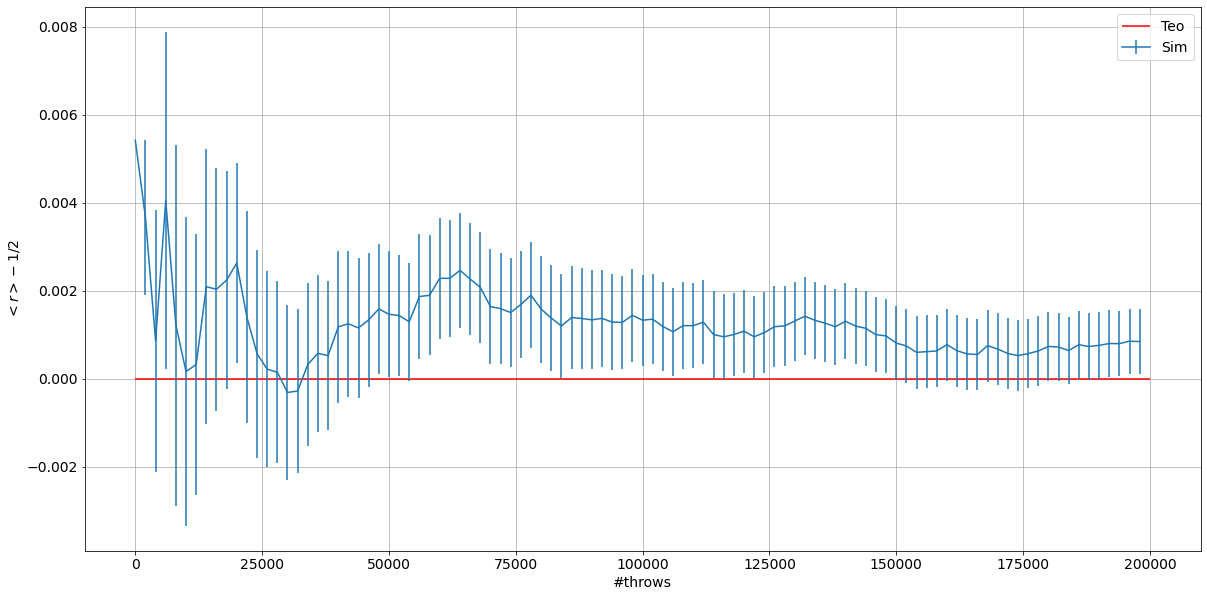

In [4]:
plt.figure(figsize=(20,10));

sum_prog= np.loadtxt("Esercizio1_1/sum_prog.txt")
err= np.loadtxt("Esercizio1_1/Err.txt")
plt.hlines(0,-1,200000,color="r",label="Teo")
plt.errorbar(x,sum_prog-0.5,yerr=err,label="Sim")
plt.legend()
plt.xlabel('#throws')
plt.ylabel('$<r> -1/2$')
plt.grid(True)
plt.show()

## Varianza
In questo secondo esercizio calcolo la varianza del valore $\langle r \rangle$, nel segeuento modo: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Anche in questo caso ho utilizzato la media a blocchi con lo stesso numero di blocchi dell'esercizio precedente.


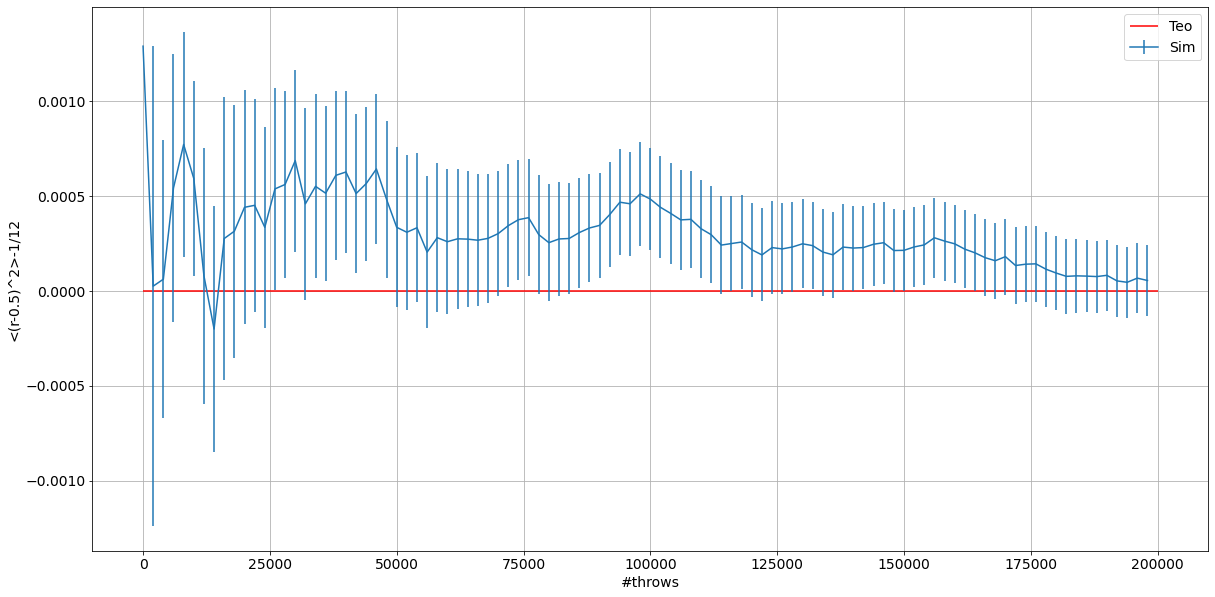

In [18]:
plt.figure(figsize=(20,10));

sum_prog_var= np.loadtxt("Esercizio1_1/sum_prog_var.txt")
err_var= np.loadtxt("Esercizio1_1/Err_var.txt")
plt.hlines(0,-1,200000,color="r",label="Teo")
plt.errorbar(x,sum_prog_var-1/12,yerr=err_var,label="Sim")
plt.legend()
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

## CHI QUADRO

In questo terzo esercizio ho implementato il test del $\chi^2$. Ho diviso l'intervallo $[0,1)$ in $M=100$ sotto intervalli. Dopo di che ho estratto $10^4$ numeri dall'intervallo e ho calcolato quanti di questi cadessero in un determinato sotto intervallo. Dopo di che ho calcolato nel seguento modo il $\chi^2$: $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}.$$ Mi aspetto che ci siano circa $100$ elementi per ogni sotto intervallo.

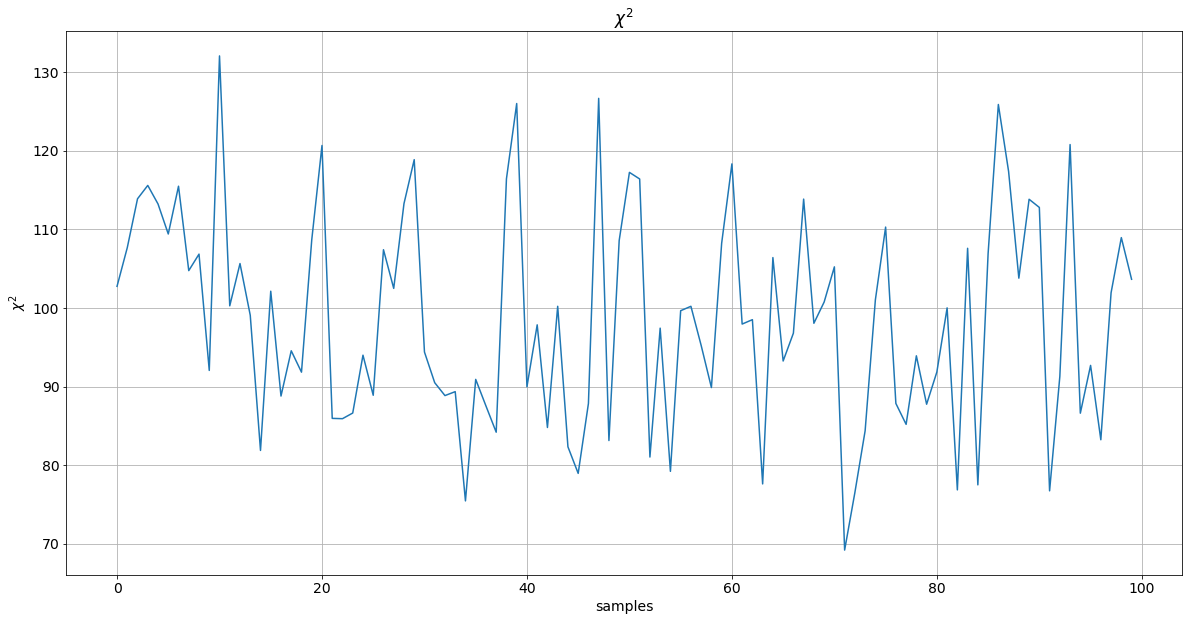

In [24]:
plt.figure(figsize=(20,10));

x= range(100)
chi_q=np.loadtxt("Esercizio1_1/chi_q.txt")
plt.plot(x,chi_q)
plt.xlabel('samples')
plt.ylabel('$\chi^2$')
plt.title("$\chi^2$")
plt.grid(True)
plt.show()

Come mi aspettavo ci sono circa $100$ elementi per ogni sotto intervallo, questo poichè i numeri sono stati estratti in maniera uniforme nell'intervallo $[0,1)$.

## Esercizio 1.2

In questo esercizio estraggo $M=10^4$ numeri casuali da una distribuzione uniforme , da una distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$ con $x\in [0;+\infty]$ e $\lambda = 1$, da una distribuzione di Cauchy $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $x\in [-\infty;+\infty]$, $\Gamma = 1$ e $\mu = 0$. 

Per ogni distribuzione ho calcolato $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ per $N=1, 2, 10, 100$ e costruito un istogramma.

Per $N=10$ e $N=100$ della distribuzione uniforme possiamo notare come la distribuzione delle medie sono un distribuzione normale come ci aspettiamo per il teorema del limite centrale. Per $N=100$ anche gli $S_N$ della distribuzione esponenziale si distribuiscono secondo una gaussiana.


In [30]:
sum_prog= np.loadtxt("Esercizio1_2/s1.txt")
sum_prog2=np.loadtxt("Esercizio1_2/s2.txt")
sum_prog10=np.loadtxt("Esercizio1_2/s10.txt")
sum_prog100=np.loadtxt("Esercizio1_2/s100.txt")

In [31]:
def Gauss(x,sigma,mean):
    norm=1/np.sqrt(2*np.pi*sigma*sigma)
    return norm*np.exp(-(x-mean)**2 / (2*sigma**2))

### Media su 1 numero

Text(0.5, 1.0, 'Cauchy')

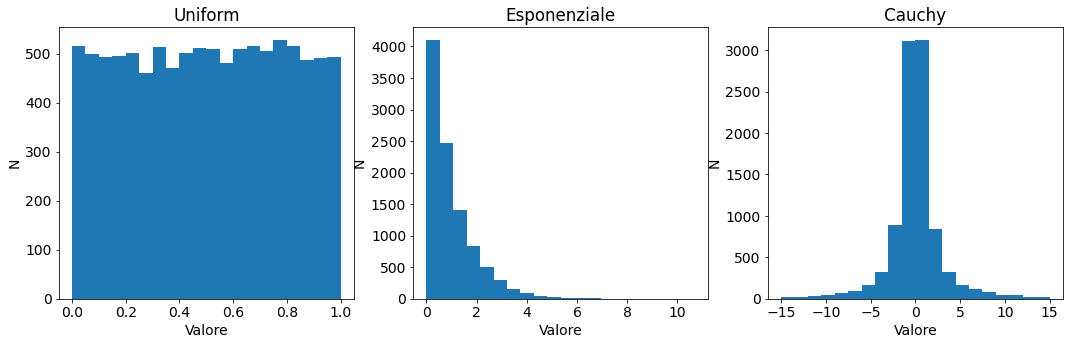

In [41]:

fig, ax = plt.subplots(1,3,figsize=(18,5))

ax[0].hist(sum_prog[:,0],bins=20)
ax[1].hist(sum_prog[:,1],bins=20)
ax[2].hist(sum_prog[:,2],range=(-15,+15),bins=20)


ax[0].set_xlabel("Valore")
ax[0].set_ylabel("N")
ax[2].set_xlabel("Valore")
ax[2].set_ylabel("N")
ax[1].set_xlabel("Valore")
ax[1].set_ylabel("N")

ax[0].set_title('Uniform')
ax[1].set_title('Esponenziale')
ax[2].set_title('Cauchy')

### Media su 2 numeri

Text(0.5, 1.0, 'Cauchy')

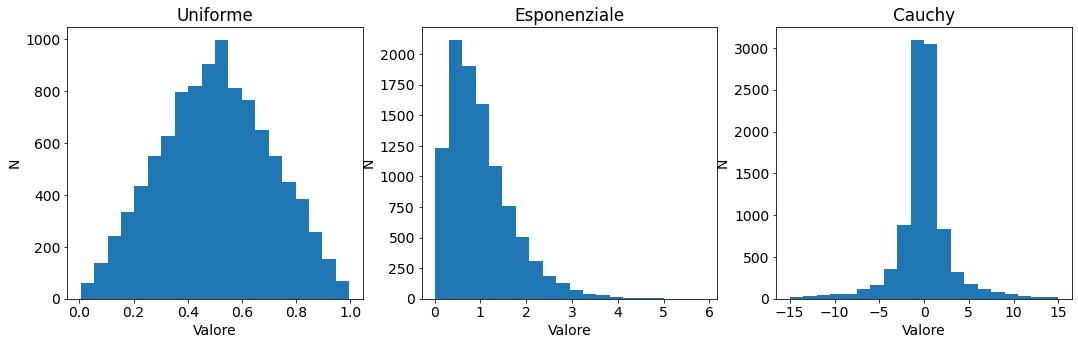

In [42]:
fig, ax = plt.subplots(1,3,figsize=(18,5))

ax[0].hist(sum_prog2[:,0],bins=20)
ax[1].hist(sum_prog2[:,1],bins=20)
ax[2].hist(sum_prog2[:,2],range=(-15,+15),bins=20)


ax[0].set_xlabel("Valore")
ax[0].set_ylabel("N")
ax[2].set_xlabel("Valore")
ax[2].set_ylabel("N")
ax[1].set_xlabel("Valore")
ax[1].set_ylabel("N")

ax[0].set_title('Uniforme')
ax[1].set_title('Esponenziale')
ax[2].set_title('Cauchy')

### Media su 10 numeri

Text(0.5, 1.0, 'Cauchy')

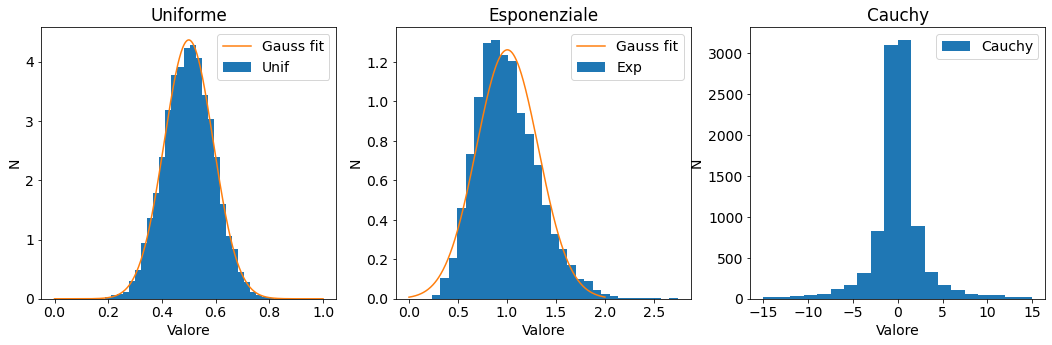

In [43]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
x_unif=np.linspace(0,1,500)
x_exp=np.linspace(0,2,500)
ax[0].hist(sum_prog10[:,0],density=1, bins=30,label="Unif")
ax[0].plot(x_unif,Gauss(x_unif,np.std(sum_prog10[:,0]),np.mean(sum_prog10[:,0])),label="Gauss fit")
ax[1].hist(sum_prog10[:,1],density=1,bins=30,label="Exp")
ax[1].plot(x_exp,Gauss(x_exp,np.std(sum_prog10[:,1]),np.mean(sum_prog10[:,1])),label="Gauss fit")
ax[2].hist(sum_prog10[:,2],range=(-15,+15),bins=20,label="Cauchy")

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_xlabel("Valore")
ax[0].set_ylabel("N")
ax[2].set_xlabel("Valore")
ax[2].set_ylabel("N")
ax[1].set_xlabel("Valore")
ax[1].set_ylabel("N")


ax[0].set_title('Uniforme')
ax[1].set_title('Esponenziale')
ax[2].set_title('Cauchy')

In questo caso ho plottato oltre agli istogrammi anche un fit gaussiano. Si nota che per la distribuzione uniforme $S_N$ sia distribuito in maniera gaussiana.

### Media su 100 numeri

Text(0.5, 1.0, 'Cauchy')

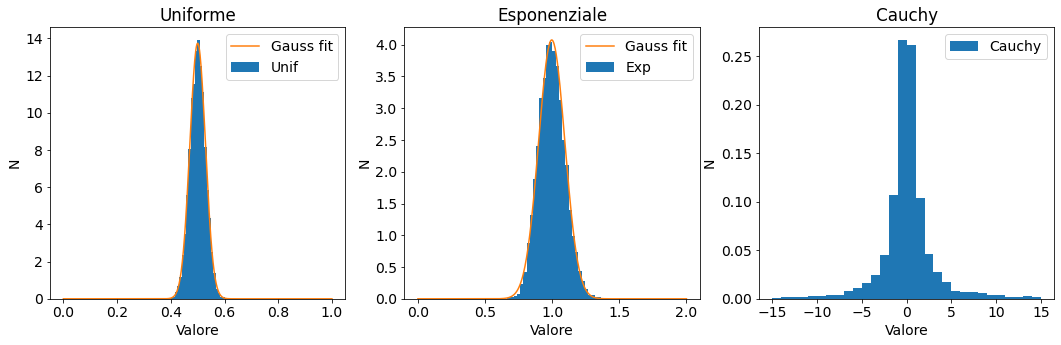

In [44]:
fig, ax = plt.subplots(1,3,figsize=(18,5))

ax[0].hist(sum_prog100[:,0],bins=30,density=True,label="Unif")
ax[0].plot(x_unif,Gauss(x_unif,np.std(sum_prog100[:,0]),np.mean(sum_prog100[:,0])),label="Gauss fit")
ax[1].hist(sum_prog100[:,1],bins=30,density=True,label="Exp")
ax[1].plot(x_exp,Gauss(x_exp,np.std(sum_prog100[:,1]),np.mean(sum_prog100[:,1])),label="Gauss fit")
ax[2].hist(sum_prog100[:,2],range=(-15,+15),bins=30,density=1,label="Cauchy")

ax[2].legend()
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Valore")
ax[0].set_ylabel("N")
ax[2].set_xlabel("Valore")
ax[2].set_ylabel("N")
ax[1].set_xlabel("Valore")
ax[1].set_ylabel("N")


ax[0].set_title('Uniforme')
ax[1].set_title('Esponenziale')
ax[2].set_title('Cauchy')



Anche in questo grafico ho aggiunto un fit Gaussiano al grafico della distribuzione esponeziale e di quella normale. In questo caso entrambe le distribuzioni delle medie seguono la distribuzione normale.

## Esercizio 1.3

In questo esercizio ho calcolato il valore di $\pi$ simulando l'esperimento di Buffon.

Ho lanciato $N=5x10^4$ volte calcolando il numero di volte che toccasse una riga per ogni singola simulazione. Per simulare il lancio ho estratto in maniera uniforme una posizione tra $[0,1)$ e un angolo utilizzando un metedo "accept-reject". Ho eseguito un totale di $10^4$ simulazione ed ho utilizzato la media a blocchi per il calcolo dell'incertezza con un numero di blocchi pari a $100$.

La formula utlizzata per il calcolo di $pi$ è la seguente: $$\pi=\frac{2LN_{throws}}{N_{hit}d}$$

con $L$ lunghezza dell'ago e $d$ distanza tra le diverse righe.


In [45]:
sum_prog= np.loadtxt("Esercizio1_3/result_pi.txt")

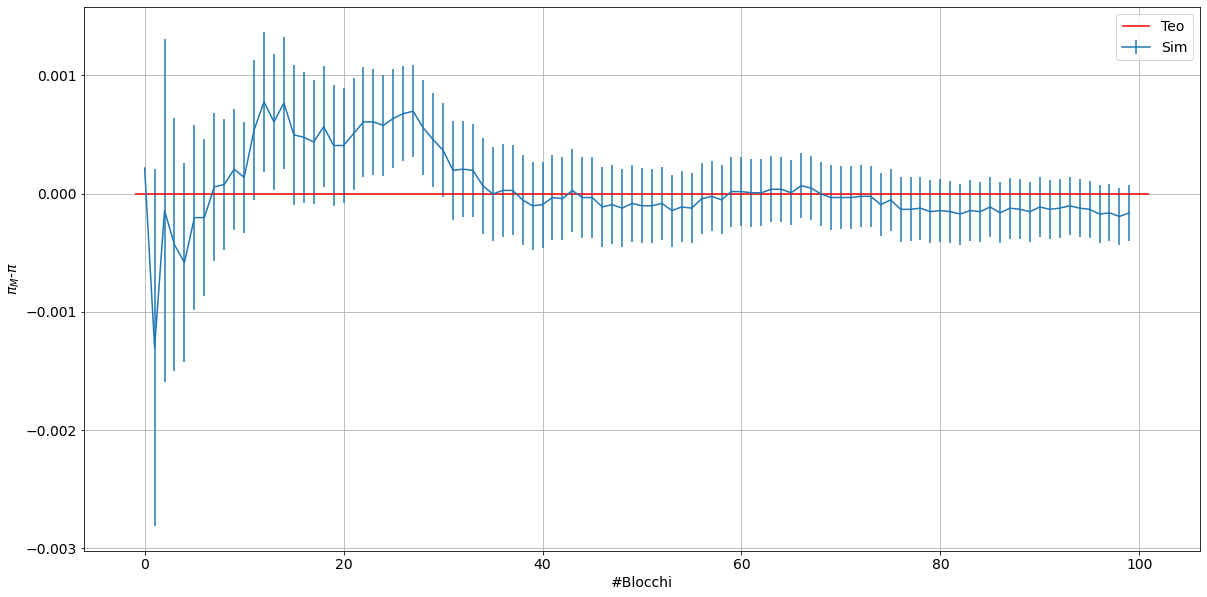

In [46]:
x = np.arange(100)
plt.figure(figsize=(20,10));
plt.errorbar(x,sum_prog[:,0]-np.pi,yerr=sum_prog[:,1],label="Sim")
plt.hlines(0,-1,101,color="r",label="Teo")
plt.xlabel('#Blocchi',)
plt.ylabel('$\pi_M$-$\pi$')
plt.grid(True)
plt.legend()
plt.show()

Nel grafico mostro i risultati della simulazione a cui ho sottratto il valore teorico. Si nota come al simulazione arriva ad una buona stima di $\pi$